(384, 4)


<Figure size 1920x1440 with 0 Axes>

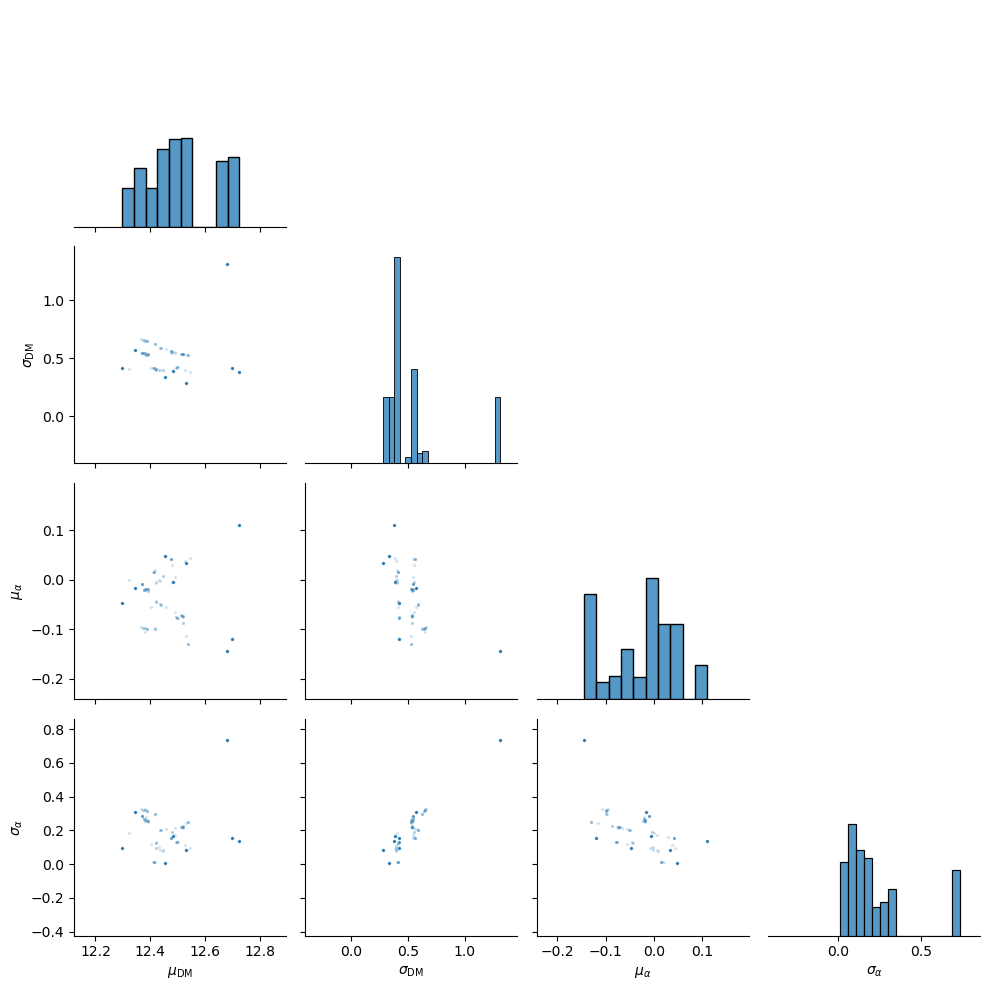

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from emcee.backends import HDFBackend

def plot_pairplot_with_truth(hdf5_file, discard=1000, thin=10, labels=None, truths=None, width_factor=1.5):
    """
    使用 Seaborn pairplot 绘制后验图，并以变量均值为中心设置 xlim/ylim，同时标出真值。

    参数：
    - hdf5_file: emcee 的 HDF5 后端路径
    - discard: 前期丢弃步数
    - thin: 抽样间隔
    - labels: 变量标签列表
    - truths: list[float]，真值点，会在每个图上标注
    - width_factor: 控制坐标轴范围宽度因子
    """
    backend = HDFBackend(hdf5_file, read_only=True)
    samples = backend.get_chain(discard=discard, thin=thin, flat=True)
    print(samples.shape)

    ndim = samples.shape[1]
    if labels is None:
        labels = [f"$\\theta_{i}$" for i in range(ndim)]
    df = pd.DataFrame(samples, columns=labels)

    means = df.mean()
    stds = df.std()
    plt.figure(dpi=300)
    g = sns.pairplot(df, corner=True, diag_kind="hist", plot_kws=dict(s=5, alpha=0.2))

    for i in range(ndim):
        for j in range(i + 1):
            ax = g.axes[i, j]
            if ax is None:
                continue

            # 设置 xlim 和 ylim 居中
            mean_x = means[labels[j]]
            std_x = stds[labels[j]]
            ax.set_xlim(mean_x - width_factor * std_x, mean_x + width_factor * std_x)

            if i == j:
                if truths:
                    ax.axvline(truths[i], color="red", linestyle="--", lw=1)
            else:
                mean_y = means[labels[i]]
                std_y = stds[labels[i]]
                ax.set_ylim(mean_y - width_factor * std_y, mean_y + width_factor * std_y)
                if truths:
                    # 添加红色十字真值点
                    ax.plot(truths[j], truths[i], "r+", markersize=8, markeredgewidth=1.5)
    # plt.savefig("post.png",dpi=300)
    plt.tight_layout()
    plt.show()
plot_pairplot_with_truth(
    hdf5_file="mcmc_chain.h5",
    discard=400,
    thin=10,
    labels=[r"$\mu_{\rm DM}$", r"$\sigma_{\rm DM}$", r"$\mu_\alpha$", r"$\sigma_\alpha$"],
    # truths=[12.575, 0.381, 0.073, 0.075],
#     truths=(12.455266668203242,
#  0.4285884092108674,
#  0.08515148383256033,
#  0.06776620586484147),
    width_factor=3
)
#  np.array([12.5, 0.38, 0.05, 0.05])

# true
# (12.484790712318109,
#  0.4365785108229181,
#  0.07376295948617051,
#  0.0748739106362481)

In [ ]:
(12.455266668203242,
 0.4285884092108674,
 0.08515148383256033,
 0.06776620586484147)

(4296, 4)


<Figure size 1920x1440 with 0 Axes>

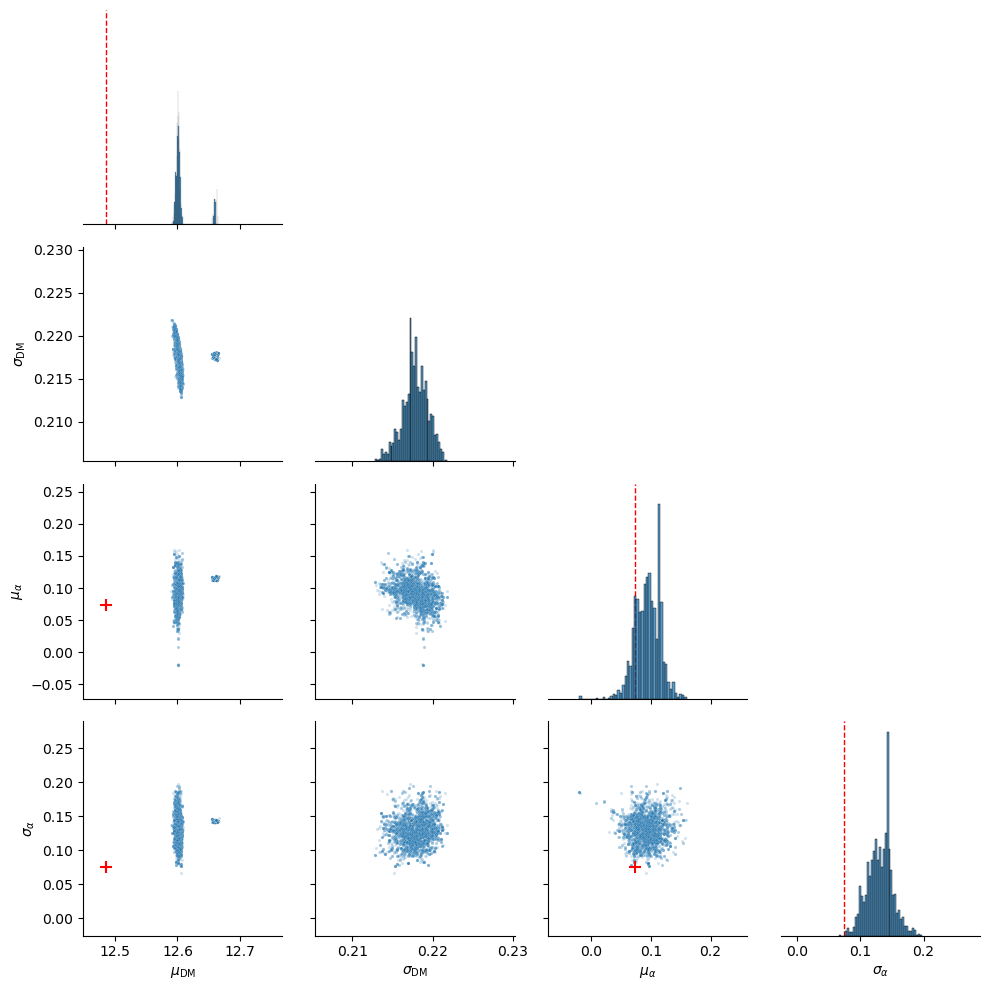

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from emcee.backends import HDFBackend

def plot_pairplot_with_truth(hdf5_file, discard=1000, thin=10, labels=None, truths=None, width_factor=1.5):
    """
    使用 Seaborn pairplot 绘制后验图，并以变量均值为中心设置 xlim/ylim，同时标出真值。

    参数：
    - hdf5_file: emcee 的 HDF5 后端路径
    - discard: 前期丢弃步数
    - thin: 抽样间隔
    - labels: 变量标签列表
    - truths: list[float]，真值点，会在每个图上标注
    - width_factor: 控制坐标轴范围宽度因子
    """
    backend = HDFBackend(hdf5_file, read_only=True)
    samples = backend.get_chain(discard=discard, thin=thin, flat=True)
    print(samples.shape)

    ndim = samples.shape[1]
    if labels is None:
        labels = [f"$\\theta_{i}$" for i in range(ndim)]
    df = pd.DataFrame(samples, columns=labels)

    means = df.mean()
    stds = df.std()
    plt.figure(dpi=300)
    g = sns.pairplot(df, corner=True, diag_kind="hist", plot_kws=dict(s=5, alpha=0.2))

    for i in range(ndim):
        for j in range(i + 1):
            ax = g.axes[i, j]
            if ax is None:
                continue

            # 设置 xlim 和 ylim 居中
            mean_x = means[labels[j]]
            std_x = stds[labels[j]]
            ax.set_xlim(mean_x - width_factor * std_x, mean_x + width_factor * std_x)

            if i == j:
                if truths:
                    ax.axvline(truths[i], color="red", linestyle="--", lw=1)
            else:
                mean_y = means[labels[i]]
                std_y = stds[labels[i]]
                ax.set_ylim(mean_y - width_factor * std_y, mean_y + width_factor * std_y)
                if truths:
                    # 添加红色十字真值点
                    ax.plot(truths[j], truths[i], "r+", markersize=8, markeredgewidth=1.5)
    # plt.savefig("post.png",dpi=300)
    plt.tight_layout()
    plt.show()
plot_pairplot_with_truth(
    hdf5_file="./mcmc_checkpoint_eta_new_nomutab.h5",
    discard=2200,
    thin=1,
    labels=[r"$\mu_{\rm DM}$", r"$\sigma_{\rm DM}$", r"$\mu_\alpha$", r"$\sigma_\alpha$"],
    truths=(12.484790712318109,
 0.4365785108229181,
 0.07376295948617051,
 0.0748739106362481),
    width_factor=8
)


In [22]:
from emcee.backends import HDFBackend
import numpy as np

# 读取链和 log posterior
backend = HDFBackend("mcmc_checkpoint_eta_new_nomutab.h5", read_only=True)
samples = backend.get_chain(discard=2200, thin=1, flat=True)
log_probs = backend.get_log_prob(discard=2200, thin=1, flat=True)

# 找到最大后验的位置（MAP）
max_idx = np.argmax(log_probs)
map_estimate = samples[max_idx]
print("MAP estimate:", map_estimate)


MAP estimate: [12.60081796  0.21823781  0.0956664   0.12465966]


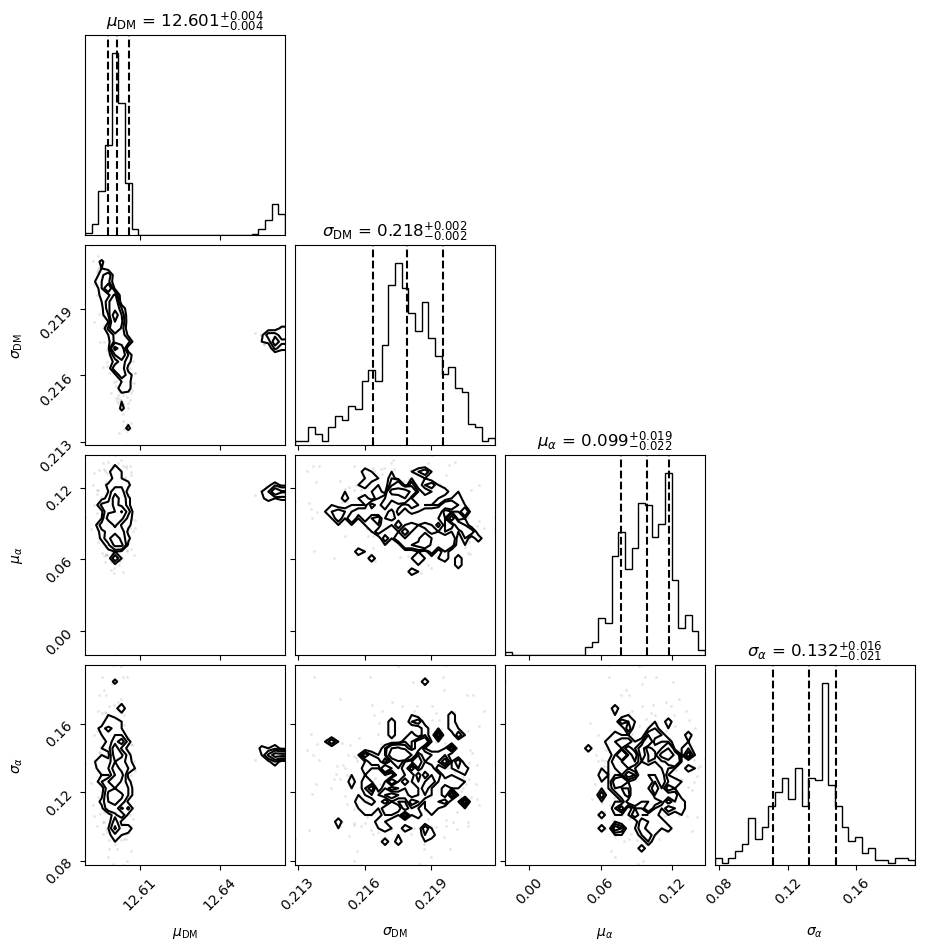

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import corner
from emcee.backends import HDFBackend

def plot_posterior_from_hdf5(hdf5_file, discard=1000, thin=10, labels=None, truths=None):
    """
    从 emcee 的 HDF5 后端文件中读取样本并绘制后验角图（corner plot）。

    参数：
    - hdf5_file: str，HDF5 文件路径
    - discard: int，前期 burn-in 步数将被丢弃
    - thin: int，抽样间隔，用于降低样本相关性
    - labels: list[str]，每个维度的标签，用于 corner 图
    - truths: list[float]，真值（如果有），用于在图上标注参考线
    """
    backend = HDFBackend(hdf5_file)

    # 获取扁平化样本链
    samples = backend.get_chain(discard=discard, thin=thin, flat=True)

    ndim = samples.shape[1]
    if labels is None:
        labels = [f"$\\theta_{i}$" for i in range(ndim)]

    fig = corner.corner(
        samples,
        labels=[r"$\mu_{\rm DM}$", r"$\sigma_{\rm DM}$", r"$\mu_\alpha$", r"$\sigma_\alpha$"],
        truths=truths,  # 可选
        show_titles=True,
        title_fmt=".3f",
        title_kwargs={"fontsize": 12},
        quantiles=[0.16, 0.5, 0.84],
        # plot_contours=False,
        plot_density=False,
        fill_contours=False,
        max_n_ticks=3,
        hist_bin_factor=1,
        bins=30,
        smooth=0.0,
        color="black",
        scatter_kwargs=dict(s=3, alpha=0.2)  # 控制散点大小和透明度
    )


# 示例调用（你可替换文件路径和标签）
plot_posterior_from_hdf5(
    "./mcmc_checkpoint_eta_new_nomutab.h5",
    discard=2000,
    thin=10,
    labels=[r"$\mu_{\rm DM}$", r"$\sigma_{\rm DM}$", r"$\mu_\alpha$", r"$\sigma_\alpha$"],
    truths=None
)


(1600, 4)


<Figure size 1920x1440 with 0 Axes>

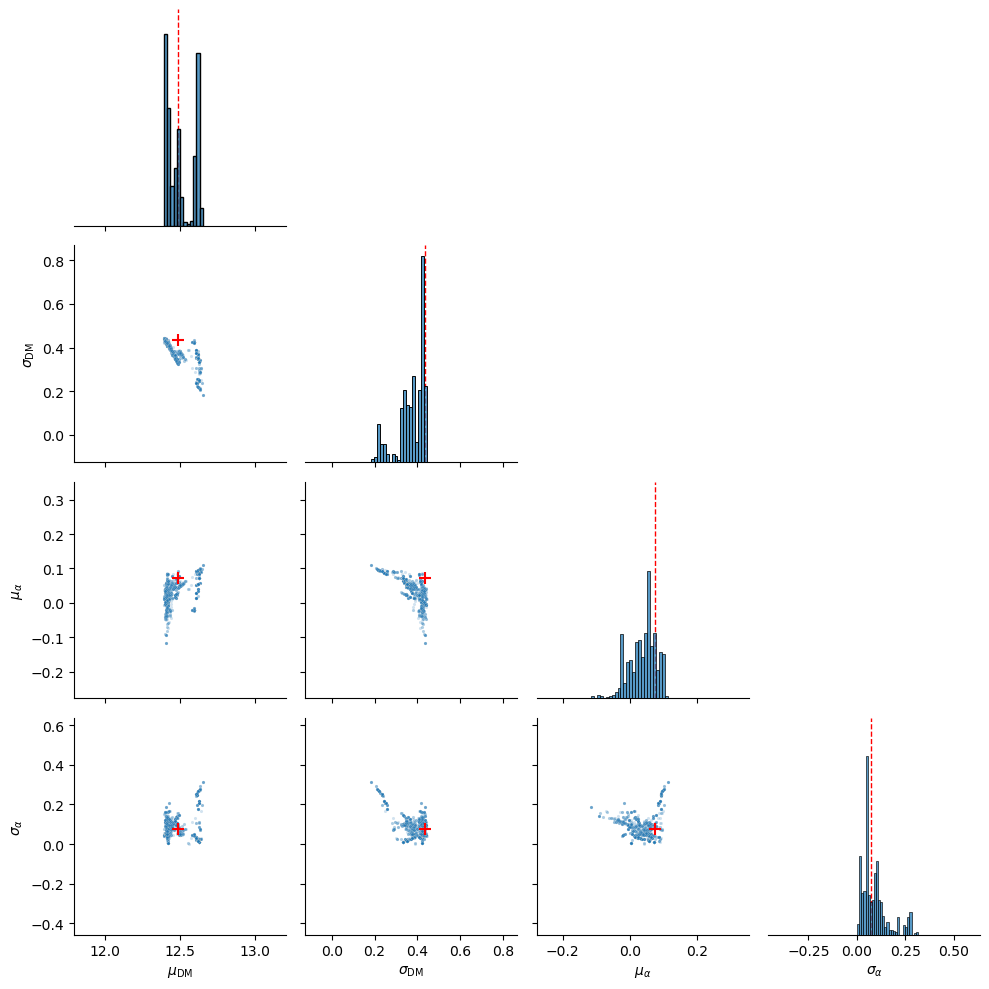

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from emcee.backends import HDFBackend

def plot_pairplot_with_truth(hdf5_file, discard=1000, thin=10, labels=None, truths=None, width_factor=1.5):
    """
    使用 Seaborn pairplot 绘制后验图，并以变量均值为中心设置 xlim/ylim，同时标出真值。

    参数：
    - hdf5_file: emcee 的 HDF5 后端路径
    - discard: 前期丢弃步数
    - thin: 抽样间隔
    - labels: 变量标签列表
    - truths: list[float]，真值点，会在每个图上标注
    - width_factor: 控制坐标轴范围宽度因子
    """
    backend = HDFBackend(hdf5_file, read_only=True)
    samples = backend.get_chain(discard=discard, thin=thin, flat=True)
    print(samples.shape)

    ndim = samples.shape[1]
    if labels is None:
        labels = [f"$\\theta_{i}$" for i in range(ndim)]
    df = pd.DataFrame(samples, columns=labels)

    means = df.mean()
    stds = df.std()
    plt.figure(dpi=300)
    g = sns.pairplot(df, corner=True, diag_kind="hist", plot_kws=dict(s=5, alpha=0.2))

    for i in range(ndim):
        for j in range(i + 1):
            ax = g.axes[i, j]
            if ax is None:
                continue

            # 设置 xlim 和 ylim 居中
            mean_x = means[labels[j]]
            std_x = stds[labels[j]]
            ax.set_xlim(mean_x - width_factor * std_x, mean_x + width_factor * std_x)

            if i == j:
                if truths:
                    ax.axvline(truths[i], color="red", linestyle="--", lw=1)
            else:
                mean_y = means[labels[i]]
                std_y = stds[labels[i]]
                ax.set_ylim(mean_y - width_factor * std_y, mean_y + width_factor * std_y)
                if truths:
                    # 添加红色十字真值点
                    ax.plot(truths[j], truths[i], "r+", markersize=8, markeredgewidth=1.5)
    # plt.savefig("post.png",dpi=300)
    plt.tight_layout()
    plt.show()
plot_pairplot_with_truth(
    hdf5_file="./mcmc_checkpoint_eta_origin2.h5",
    discard=00,
    thin=1,
    labels=[r"$\mu_{\rm DM}$", r"$\sigma_{\rm DM}$", r"$\mu_\alpha$", r"$\sigma_\alpha$"],
    truths=(12.484790712318109,
 0.4365785108229181,
 0.07376295948617051,
 0.0748739106362481),
    width_factor=8
)
